In [156]:
import Bio.Phylo.Applications as app
from Bio import Phylo
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import matplotlib.pyplot as plt
import matplotlib
import os
import sys
import pandas as pd
import graphviz
import pygraphviz
import ete3

# adding project folder to lib search path
project = "/".join((os.path.split(os.getcwd())[0], os.path.split(os.getcwd())[1], 'scripts'))
if project not in sys.path:
    sys.path.append(project)
    
from loader import *
import work_with_files
import patients_and_translation
import phylo_tree
import classificator_k_mer
from data_prep_k_mer import *
from calculating_metrics import *

In [2]:
haplo_seq_dict, days = work_with_files.read_fasta_haplo(f'data/fasta/hivevo_p1_V3.fasta')
seq_dict, seq_name_dict = patients_and_translation.preparing_data(haplo_seq_dict, days)

In [3]:
days

['122',
 '562',
 '1084',
 '1254',
 '1282',
 '1393',
 '1861',
 '2303',
 '2578',
 '2639',
 '2922',
 '2996']

In [4]:
id_ = 0

for dict_ in haplo_seq_dict:
    dict_['id'] = id_
    id_ += 1
    for day in days:
        if day in dict_['desc']:
            dict_['day'] = day
            dict_.pop('desc')
            break
        else:
            continue
    else:
        dict_['day'] = '0'
        dict_.pop('desc')

In [5]:
seq_data = pd.DataFrame.from_dict(haplo_seq_dict, orient='columns')

seq_data.set_index('id', inplace=True)

seq_data

,seq,day
id,,
0,GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAG...,122
1,GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAG...,562
2,GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAG...,562
3,GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAG...,562
4,GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAG...,562
...,...,...
99,GTGGTGTCAACTCAATTGCTATTAAATGGCAGTCTAGCAGAAGAAG...,2922
100,GTGGTGTCAACTCAATTGCTATTAAATGGCAGTCTAGCAGAAGAAG...,2996
101,GTGGTGTCAACTCAATTGCTATTAAATGGCAGTCTAGCAGAAGAAG...,2922


In [6]:
seq_data_562 = seq_data.loc[seq_data['day'] == '562']
seq_data_1084 = seq_data.loc[seq_data['day'] == '1084']

In [41]:
records = []

seq_ex_row = seq_data_1084.iloc[0]
seq_ex, id_, day = seq_ex_row['seq'], seq_ex_row.name, seq_ex_row['day']

rec = SeqRecord(Seq(seq_ex))
rec.id = str(id_) + '_d=' + day
rec.name = day
records.append(rec)

for index, row in seq_data_562.iterrows():
    id_, seq, day = index, row['seq'], row['day']
    rec = SeqRecord(Seq(seq))
    rec.id = str(id_) + '_d=' + day
    rec.name = day
    records.append(rec)

In [42]:
records

[SeqRecord(seq=Seq('GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAGACATAATA...CAT'), id='14_d=1084', name='1084', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAGACATAATA...CAT'), id='1_d=562', name='562', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAGACATAATA...CAT'), id='2_d=562', name='562', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAGACATAATA...CAT'), id='3_d=562', name='562', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAGACATAATA...CAT'), id='4_d=562', name='562', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGGTATCAACTCAATTGCTGTTAAATGGCAGTCTAGCAGAAGAAGACATAATA...CAT'), id='5_d=562', name='562', description='<unknown description>', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGGTATCAACTCAATT

In [43]:
with open('test.phy', 'w') as file:
    SeqIO.write(records, file, 'phylip')

In [152]:
#phyml = app.PhymlCommandline(cmd = '-i test.phy -d nt -m GTR -b 100')
phyml = app.PhymlCommandline(input='test.phy', cmd='phyml')
phyml.set_parameter('-d', 'nt')
phyml.set_parameter('-m', 'GTR')
phyml.set_parameter('-b', 100)
#phyml.set_parameter('-i', 'test.phy')

In [153]:
print(phyml())

("\n. Command line: /usr/lib/phyml/bin/phyml-mpi -i test.phy -d nt -b 100 -m GTR \n\n\n\n\n\n\t\t\t⁜\t SETTINGS \t⁜  \n\n\n        ‣ Sequence filename:\t\t\t\t test.phy\n        ‣ Data type:\t\t\t\t\t dna\n        ‣ Alphabet size:\t\t\t\t 4\n        ‣ Sequence format:\t\t\t\t interleaved\n        ‣ Number of data sets:\t\t\t\t 1\n        ‣ Nb of bootstrapped data sets:\t\t\t 100\n        ‣ Compute approximate likelihood ratio test:\t no\n        ‣ Model name:\t\t\t\t\t GTR\n        ‣ Proportion of invariable sites:\t\t 0.000000\n        ‣ Number of subst. rate catgs:\t\t\t 4\n        ‣ Gamma distribution parameter:\t\t\t estimated\n        ‣ 'Middle' of each rate class:\t\t\t mean\n        ‣ Nucleotide equilibrium frequencies:\t\t empirical\n        ‣ Optimise tree topology:\t\t\t yes\n        ‣ Tree topology search:\t\t\t\t NNIs\n        ‣ Starting tree:\t\t\t\t BioNJ\n        ‣ Add random input tree:\t\t\t no\n        ‣ Optimise branch lengths:\t\t\t yes\n        ‣ Optimise substitut

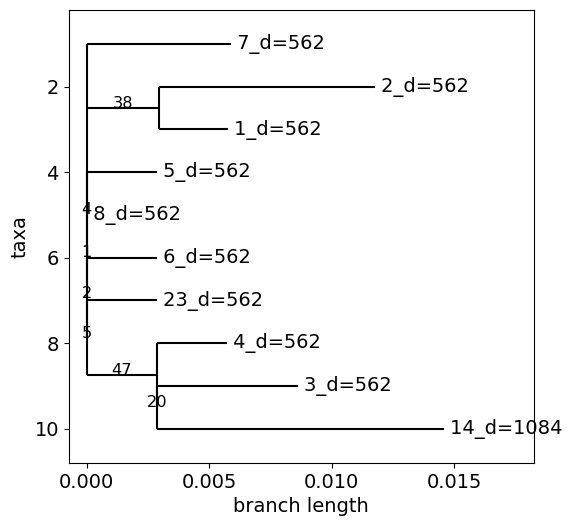

In [174]:
def plot_tree(tree_file, output_file):
    tree = Phylo.read(tree_file, "newick")
    matplotlib.rc('font', size=14)
    fig = plt.figure(figsize=(6, 6), dpi=100)
    axes = fig.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes)
    plt.show()

    return tree

tree = plot_tree('test.phy_phyml_tree.txt', 'asd.png')

In [175]:
def find_neighbour(tree, target_clade_name):
    
    '''try:
        search_clade = next(tree.find_clades(target_clade_name))
    except:
        raise ValueError('Wrong name of the clade')'''
    
    clades_list = tree.get_terminals()
    
    search_clade = next(tree.find_clades(target_clade_name))
    
    clades_names = [clades_list[i].name for i in range(len(clades_list))]
    
    dist_dict = {}
    
    for cl_name in clades_names:
        if cl_name != target_clade_name:
            dist_dict[cl_name] = tree.distance(cl_name, target_clade_name)
            
    return dist_dict

find_neighbour(tree, '14_d=1084')

{'7_d=562': 0.02050915,
 '2_d=562': 0.026367540000000002,
 '1_d=562': 0.020373830000000002,
 '5_d=562': 0.01748725,
 '8_d=562': 0.01460345,
 '6_d=562': 0.017486520000000002,
 '23_d=562': 0.01747384,
 '4_d=562': 0.01460471,
 '3_d=562': 0.01748734}

In [134]:
clades_list = tree.get_terminals()
clades_list

[Clade(branch_length=0.00583867, name='7_d=562'),
 Clade(branch_length=0.00287262, name='4_d=562'),
 Clade(branch_length=0.01172962, name='14_d=1084'),
 Clade(branch_length=0.00575478, name='3_d=562'),
 Clade(branch_length=0.0028829, name='6_d=562'),
 Clade(branch_length=0.0, name='8_d=562'),
 Clade(branch_length=0.0028836, name='5_d=562'),
 Clade(branch_length=0.0028702, name='23_d=562'),
 Clade(branch_length=0.00279812, name='1_d=562'),
 Clade(branch_length=0.00879233, name='2_d=562')]

In [142]:
clades_names = [clades_list[i].name for i in range(len(clades_list))]

clades_names

['7_d=562',
 '4_d=562',
 '14_d=1084',
 '3_d=562',
 '6_d=562',
 '8_d=562',
 '5_d=562',
 '23_d=562',
 '1_d=562',
 '2_d=562']

In [165]:
def get_parent(tree, child_clade):
    node_path = tree.get_path(child_clade)
    return node_path[-2]

In [138]:
def all_parents(tree):
    parents = {}
    for clade in tree.find_clades(order='level'):
        for child in clade:
            parents[child] = clade
    return parents

all_parents(tree)

{Clade(branch_length=0.00583867, name='7_d=562'): Clade(),
 Clade(branch_length=0.00287137, confidence=87): Clade(),
 Clade(branch_length=0.0, confidence=11): Clade(),
 Clade(branch_length=0.00287262, name='4_d=562'): Clade(branch_length=0.00287137, confidence=87),
 Clade(branch_length=0.0, confidence=33): Clade(branch_length=0.00287137, confidence=87),
 Clade(branch_length=0.0028829, name='6_d=562'): Clade(branch_length=0.0, confidence=11),
 Clade(branch_length=0.0, confidence=3): Clade(branch_length=0.0, confidence=11),
 Clade(branch_length=0.01172962, name='14_d=1084'): Clade(branch_length=0.0, confidence=33),
 Clade(branch_length=0.00575478, name='3_d=562'): Clade(branch_length=0.0, confidence=33),
 Clade(branch_length=0.0, name='8_d=562'): Clade(branch_length=0.0, confidence=3),
 Clade(branch_length=0.0, confidence=3): Clade(branch_length=0.0, confidence=3),
 Clade(branch_length=0.0028836, name='5_d=562'): Clade(branch_length=0.0, confidence=3),
 Clade(branch_length=0.0, confidenc

In [166]:
from ete3 import Tree

tree = Tree('test.phy_phyml_tree.txt', format=2)
print(tree)


   /-7_d=562
  |
  |   /-2_d=562
--|--|
  |   \-1_d=562
  |
  |   /-5_d=562
   \-|
     |   /-8_d=562
      \-|
        |   /-6_d=562
         \-|
           |   /-23_d=562
            \-|
              |   /-4_d=562
               \-|
                 |   /-3_d=562
                  \-|
                     \-14_d=1084


In [167]:
tree.get_leaf_names()

['7_d=562',
 '2_d=562',
 '1_d=562',
 '5_d=562',
 '8_d=562',
 '6_d=562',
 '23_d=562',
 '4_d=562',
 '3_d=562',
 '14_d=1084']

In [172]:
tree.get_common_ancestor('3_d=562', '14_d=1084')

Tree node '' (0x7fafc201171)